# Week 9

## Notes:  Networks

**Def** A collection of dots called nodes connected by lines called edges.  A network is also called a graph.

We can think about the nodes of a network `G` as a collection of numbers `0,1,2,3,...` and the edges of `G` as a collection of tuples representing the nodes the edges connect `(0,2),(1,7),(1,2),(2,5),...`.

Networks can be used to model connection between people, or places, or things.  Networks that model the connections between people are typically called _friendship networks_.

Friendship networks can be used to investigate
1. How do the friendships change over time
2. How connected in the world (degrees of separation).

Let `G` be a network with set of nodes `nodes(G)` and set of edges `edges(G)`.

For each node, `x`, in `nodes(G)`, the number of edges containing `x` is called the _degree_ of `x` or `deg(x)`.

A node `y` is _adjacent_ to `x` if there is an edge connecting them.  The collection of all nodes that are adjacent to `x` is called the _neighborhood_ of `x`, `N(x)`.

### NetworkX library

In [1]:
import networkx as nx

In [11]:
G = nx.Graph()

In [3]:
type(G)

networkx.classes.graph.Graph

In [12]:
G.add_nodes_from(['a','b','c','d','e'])

In [13]:
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e'))

In [14]:
G.add_edge('a','b')

In [15]:
G.edges()

EdgeView([('a', 'b')])

In [16]:
G.add_edges_from([('a','d'),('a','e'),('b','c'),('c','e')])

In [17]:
G.edges()

EdgeView([('a', 'b'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('c', 'e')])

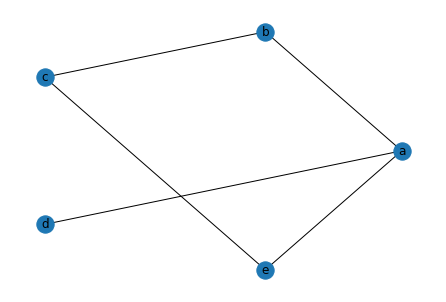

In [21]:
nx.draw(G,pos=nx.circular_layout(G),with_labels=True)

In [27]:
neighborhood_a = list(G['a'])
neighborhood_a

['b', 'd', 'e']

In [23]:
len(G['a'])

3

In [29]:
neighborhood_b = list(G['c'])
neighborhood_b

['b', 'e']

### Complete Network

A network of `n` nodes where each node is connected to all of the other nodes.

In [4]:
def CompleteNetwork(n):
    comp = nx.Graph()
    comp.add_nodes_from([i for i in range(n)])
    comp.add_edges_from([(x,y) for x in range(n) for y in range(n) if x < y])
    return comp

In [5]:
comp5 = CompleteNetwork(5)

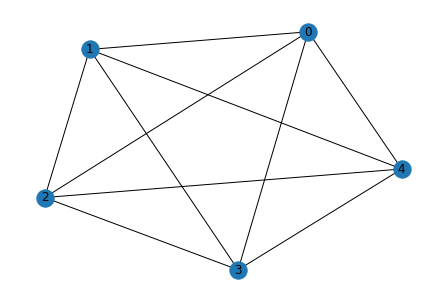

In [6]:
nx.draw(comp5,with_labels=True)

### Cycles

This network on `n` nodes connects the nodes into a circle, so each nodes is only connected to its closest two neighbors.

In [10]:
def CycleNetwork(n):
    cycle = nx.Graph()
    cycle.add_nodes_from([i for i in range(n)])
    cycle.add_edges_from([(x,y) for x in range(n) for y in range(n) if y == (x+1)%n])
    return cycle

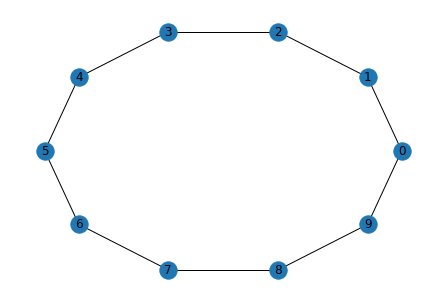

In [11]:
C = CycleNetwork(10)
nx.draw(C,pos=nx.circular_layout(C),with_labels=True)

### Random Network

This network on `n` nodes, the edges are randomly included with a given probability `p`.  Each possible edges has a percent chance of being included, determined by `p`.

In [12]:
import random

In [13]:
def RandomNetwork(n,p):
    rand_net = nx.Graph()
    rand_net.add_nodes_from([i for i in range(n)])
    rand_net.add_edges_from([(x,y) for x in range(n) for y in range(n) if x < y and random.random() < p])
    return rand_net

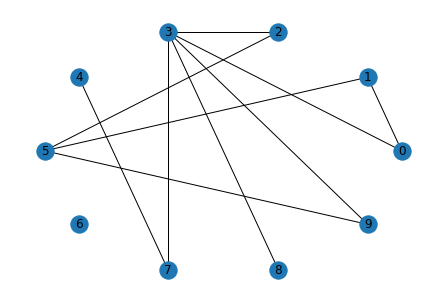

In [20]:
R = RandomNetwork(10,0.2)
nx.draw(R,pos=nx.circular_layout(R),with_labels=True)

In [21]:
len(R.edges())

10

In [25]:
R[9]

AtlasView({3: {}, 5: {}})

In [26]:
R[2]

AtlasView({3: {}, 5: {}})

In [44]:
def MobiusNetwork(even_n):
    mobius = nx.Graph()
    k = even_n//2
    mobius.add_nodes_from([i for i in range(k)])
    mobius.add_nodes_from([str(i) for i in range(k)])
    mobius.add_edges_from([(i,str(i)) for i in range(k)])
    mobius.add_edges_from([(i,i+1) for i in range(k-1)])
    mobius.add_edges_from([(str(i),str(i+1)) for i in range(k-1)])
    mobius.add_edges_from([(str(k-1),0),(k-1,str(0))])
    return mobius

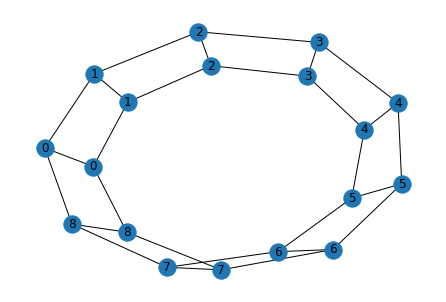

In [48]:
M = MobiusNetwork(18)
nx.draw(M,with_labels=True)

In [40]:
k=16//2

In [41]:
[i for i in range(k)]

[0, 1, 2, 3, 4, 5, 6, 7]